In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from scipy.integrate import quad

import lilguys as lguys
from lilguys import units as lu
import arya

In [3]:
out = lguys.Output("../models/isolation/out")

In [4]:
snap_i = out[0]
snap_f = out[-1]

In [5]:
prof_i = lguys.profile.Profile(snap_i)
prof_f = lguys.profile.Profile(snap_f)

shifting by [-0.14296179 -0.06667663  0.32009122], [-0.04749487  0.00692956 -0.0168288 ]
shifting by [ 0.46713212 -0.0596359   0.00163827], [-0.00274895 -0.10496981 -0.07214379]


In [6]:
prof_i.compute_density()
prof_f.compute_density()

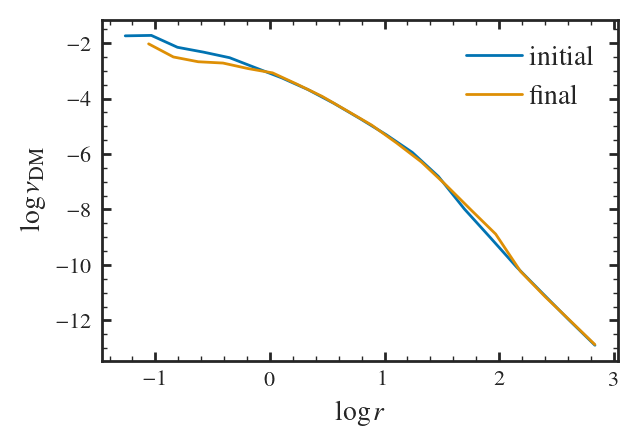

In [7]:
plt.plot(np.log10(prof_i.r), np.log10(prof_i.nu_DM), label="initial")
plt.plot(np.log10(prof_f.r), np.log10(prof_f.nu_DM), label="final")
plt.legend()
plt.ylabel(r"$\log \nu_{\rm DM}$")
plt.xlabel(r"$\log r$")
plt.savefig("isolation_profile.pdf")

In [8]:
def get_Vmax(snap, rs=np.linspace(0.25, 10, 100)):
    vs = [get_Vc(snap, r) for r in rs]
    idx_max = np.argmax(vs)
    return vs[idx_max], rs[idx_max]
def get_Vc(snap, r):
    n = np.sum(snap.r < r)
    vs =  np.sqrt(n * snap.m/r) 
    return vs * lu.V_0

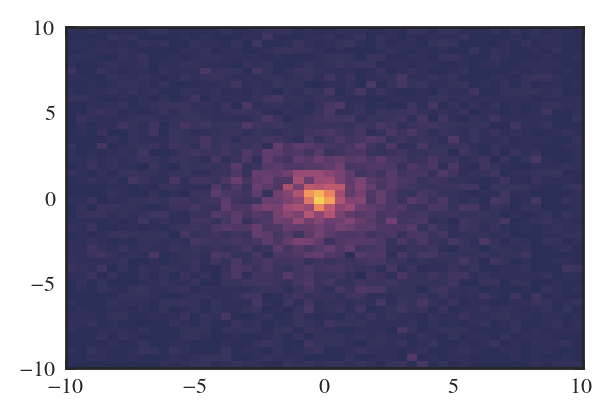

In [9]:
plt.hist2d(snap_i.x, snap_i.y, 50, range=([-10, 10], [-10, 10]));

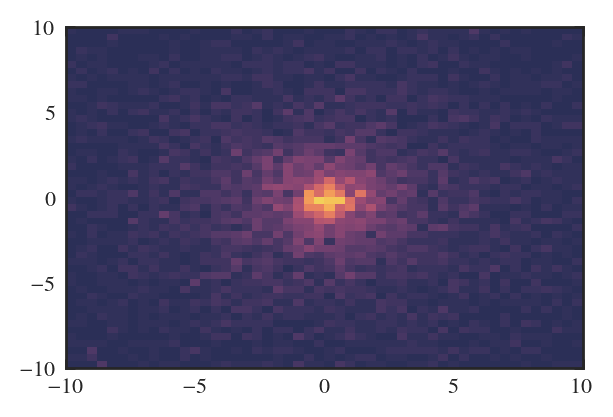

In [10]:
plt.hist2d(snap_f.pos[:, 0], snap_f.pos[:, 1], 50, range=([-10, 10], [-10, 10]));

In [11]:
ke = lguys.profile.get_KE(out)
te = lguys.profile.get_Etot(out)

Text(0, 0.5, 'total energy')

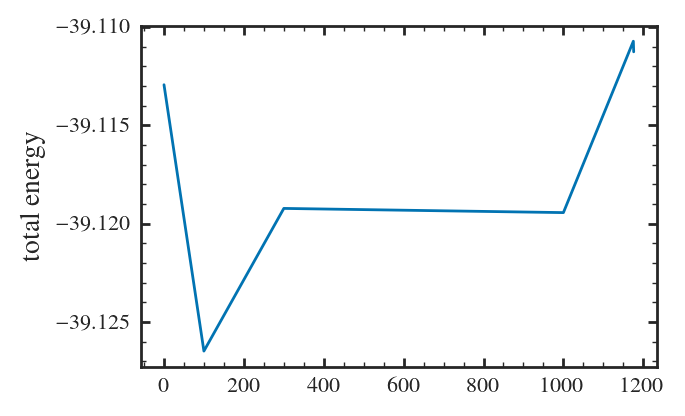

In [12]:
plt.plot(out.t, te)
plt.ylabel("total energy")

In [13]:
momentum = np.sum(out.vel, axis=1)

Text(0, 0.5, 'momentum')

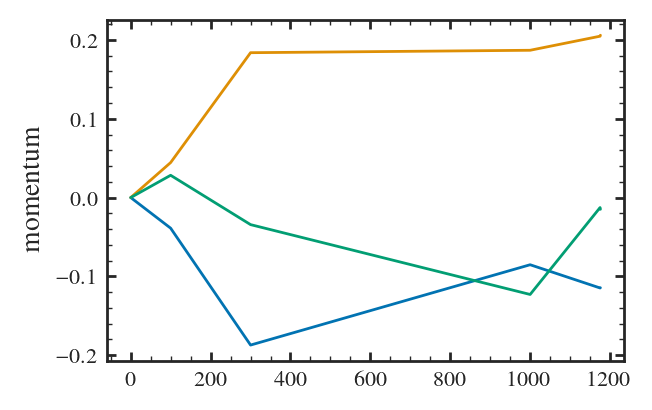

In [14]:
for i in range(3):
    plt.plot(out.t, momentum[:, i])
plt.ylabel("momentum")

In [15]:
L = np.sum(out.m * np.cross(out.pos, out.vel), axis=1)

Text(0, 0.5, 'L')

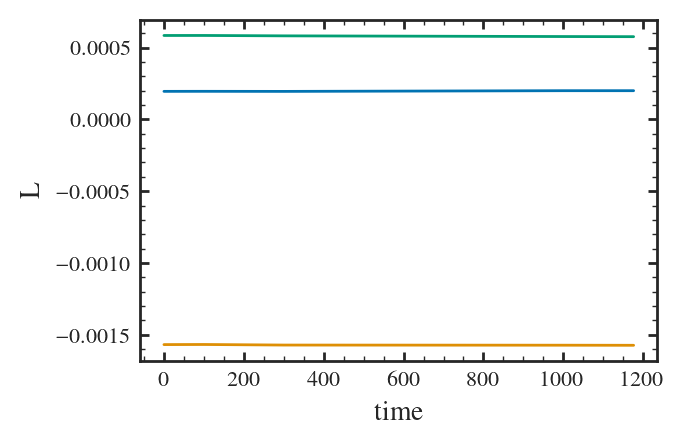

In [16]:
for i in range(3):
    plt.plot(out.t, L[:, i])
plt.xlabel("time")
plt.ylabel("L")

In [60]:
new = lguys.Snapshot.file("../mw_models/fornax/orbit_0.hdf5")

In [20]:
centered = lguys.profile.center_snapshot(new)

shifting by [ 31.56999969 102.58999634 122.76000214], [-0.1825      0.50735635 -0.37699375]


(array([  33.,  312., 1061., 2171., 2524., 1782.,  825.,  315.,   86.,
          20.]),
 array([ 0.        ,  6.96252396, 13.92504792, 20.88757188, 27.85009584,
        34.8126198 , 41.77514376, 48.73766772, 55.70019168, 62.66271564,
        69.6252396 ]),
 <BarContainer object of 10 artists>)

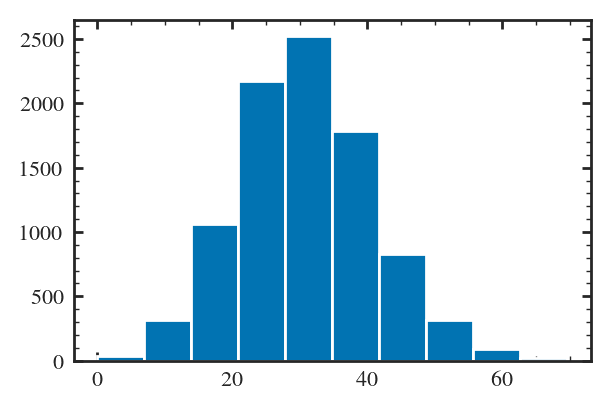

In [21]:
plt.hist(centered.v*lguys.units.V_0) 

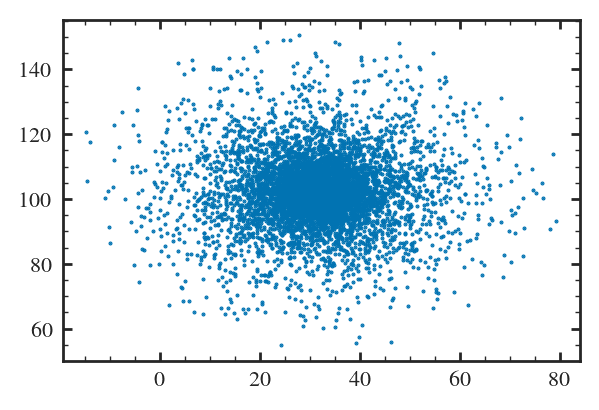

In [22]:
#lguys.profile.center_snapshot(new, inplace=True)
plt.scatter(new.x, new.y, s=0.2)

In [23]:
from scipy.spatial import KDTree

In [24]:
new.pos.shape

(9129, 3)

In [61]:
X = new.pos[:, 0:2]

In [57]:
from scipy.spatial import KDTree

In [64]:
xs

array([-14.65723038, -12.78098473, -10.90473907,  -9.02849342,
        -7.15224777,  -5.27600212,  -3.39975647,  -1.52351082,
         0.35273483,   2.22898048,   4.10522614,   5.98147179,
         7.85771744,   9.73396309,  11.61020874,  13.48645439,
        15.36270004,  17.23894569,  19.11519135,  20.991437  ,
        22.86768265,  24.7439283 ,  26.62017395,  28.4964196 ,
        30.37266525,  32.2489109 ,  34.12515656,  36.00140221,
        37.87764786,  39.75389351,  41.63013916,  43.50638481,
        45.38263046,  47.25887611,  49.13512177,  51.01136742,
        52.88761307,  54.76385872,  56.64010437,  58.51635002,
        60.39259567,  62.26884132,  64.14508698,  66.02133263,
        67.89757828,  69.77382393,  71.65006958,  73.52631523,
        75.40256088,  77.27880653,  79.15505219])

In [71]:
np.convolve(xs, [0.5, 0.5], mode="valid")

array([-13.71910755, -11.8428619 ,  -9.96661625,  -8.0903706 ,
        -6.21412495,  -4.3378793 ,  -2.46163364,  -0.58538799,
         1.29085766,   3.16710331,   5.04334896,   6.91959461,
         8.79584026,  10.67208591,  12.54833157,  14.42457722,
        16.30082287,  18.17706852,  20.05331417,  21.92955982,
        23.80580547,  25.68205112,  27.55829678,  29.43454243,
        31.31078808,  33.18703373,  35.06327938,  36.93952503,
        38.81577068,  40.69201633,  42.56826199,  44.44450764,
        46.32075329,  48.19699894,  50.07324459,  51.94949024,
        53.82573589,  55.70198154,  57.5782272 ,  59.45447285,
        61.3307185 ,  63.20696415,  65.0832098 ,  66.95945545,
        68.8357011 ,  70.71194675,  72.58819241,  74.46443806,
        76.34068371,  78.21692936])

In [70]:
1/2*(xs[1:]+ xs[:-1])

array([-13.71910755, -11.8428619 ,  -9.96661625,  -8.0903706 ,
        -6.21412495,  -4.3378793 ,  -2.46163364,  -0.58538799,
         1.29085766,   3.16710331,   5.04334896,   6.91959461,
         8.79584026,  10.67208591,  12.54833157,  14.42457722,
        16.30082287,  18.17706852,  20.05331417,  21.92955982,
        23.80580547,  25.68205112,  27.55829678,  29.43454243,
        31.31078808,  33.18703373,  35.06327938,  36.93952503,
        38.81577068,  40.69201633,  42.56826199,  44.44450764,
        46.32075329,  48.19699894,  50.07324459,  51.94949024,
        53.82573589,  55.70198154,  57.5782272 ,  59.45447285,
        61.3307185 ,  63.20696415,  65.0832098 ,  66.95945545,
        68.8357011 ,  70.71194675,  72.58819241,  74.46443806,
        76.34068371,  78.21692936])

In [84]:
k = 10
cutoff = 5
η = 2

tree = KDTree(X)


image, x_edges, y_edges = np.histogram2d(X[:,0], X[:,1], bins=50)
x_mid = 1/2*(x_edges[1:]+ x_edges[:-1])
y_mid = 1/2*(y_edges[1:] + y_edges[:-1])

image_old = image.copy()


dx = x_edges[1] - x_edges[0]

coords = np.where((image > 0))
itercoords = np.transpose(coords)
weights = np.minimum(image[coords], cutoff)
image[coords] = image[coords] - weights

for i, j, w in zip(*coords, weights):
    dists, idxs = tree.query((x_mid[i], y_mid[j]), k=k)
    sigma = η*dists[-1]/np.sqrt(k)/dx
    kern = lguys.image.gaussian_kernel(sigma)
    lguys.image.add_overlay(image, w*kern, i, j)

In [119]:
mpl.colors.LogNorm?

Init signature: mpl.colors.LogNorm(vmin=None, vmax=None, clip=False)
Docstring:      Normalize a given value to the 0-1 range on a log scale.
File:           /cosma/local/Python/3.10.1/lib/python3.10/site-packages/matplotlib/colors.py
Type:           type
Subclasses:     


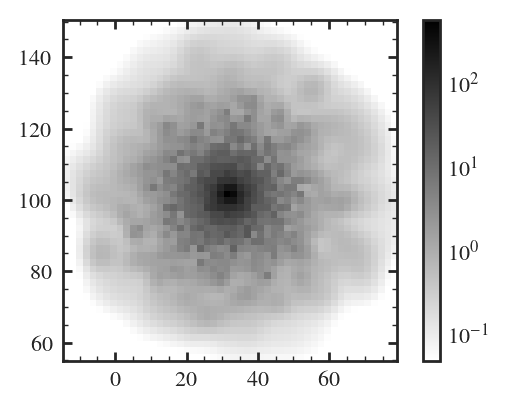

In [131]:
lguys.image.mag_image(new.x, new.y, eta=2)
plt.colorbar()

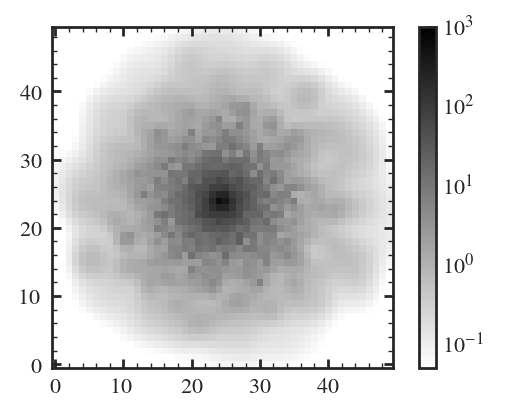

In [120]:
plt.imshow(lguys.image.kernel_hist2d(new.x, new.y), cmap="gray_r",  origin="lower", norm=mpl.colors.LogNorm(0.05, 1e3))
plt.colorbar()

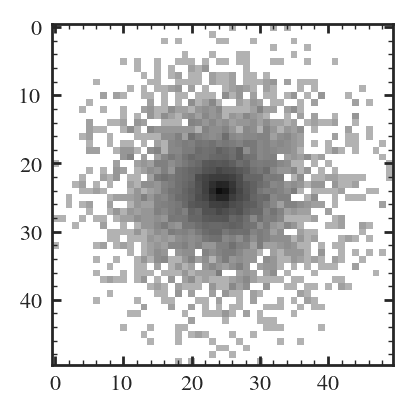

In [86]:
plt.imshow(image_old, cmap="gray_r", norm=mpl.colors.LogNorm(0.05, 1e3))

In [90]:
from scipy.signal import convolve2d

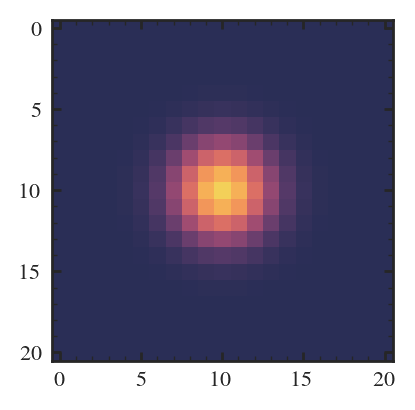

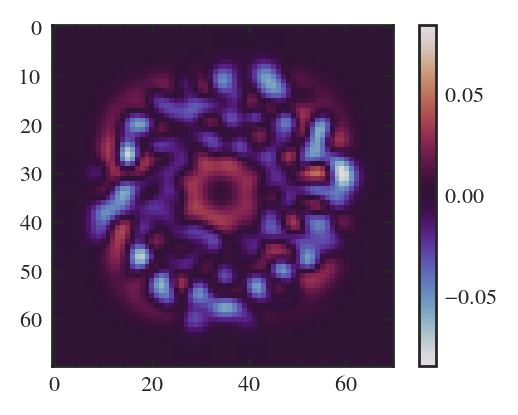

In [91]:
kern = lguys.image.gaussian_kernel(2)
plt.imshow(kern)
plt.show()

resid = image - image_old

resid = convolve2d(resid, kern)
vabs = np.max(np.abs(resid))
plt.imshow(resid, cmap="twilight", vmin=-vabs, vmax=vabs)
plt.colorbar()

In [94]:
np.sum(image)

9116.497443930273

In [95]:
np.sum(image_old)

9129.0

By poisson statistics, the varience is equal to the bin count. So 